# Bengali Hate Speech Detection - Data Exploration

**Project Goal:** Build a multi-label hate speech detection system for Bengali social media content

**Datasets:**
1. Multi-labeled Toxic Comments (CSV)
2. Bangla Hate Dataset (XLSX)

**Author:** [Ridwan Ahmed Arman]


In [3]:
# Essential libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Setup
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("🚀 Starting Bengali Hate Speech Data Exploration")
print("="*50)

🚀 Starting Bengali Hate Speech Data Exploration


In [4]:
# Load Multi-labeled Toxic Comments Dataset
print("📊 LOADING DATASET 1: Multi-Labeled Toxic Comments")
print("-" * 40)

# Load the CSV file
df1 = pd.read_csv('../data/Multi_labeled_toxic_comments.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📏 Shape: {df1.shape} (rows, columns)")
print(f"📋 Columns: {list(df1.columns)}")

# Show first few rows
print(f"\n👀 First 3 examples:")
df1.head(3)

📊 LOADING DATASET 1: Multi-Labeled Toxic Comments
----------------------------------------
✅ Dataset loaded successfully!
📏 Shape: (16073, 7) (rows, columns)
📋 Columns: ['text', 'vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']

👀 First 3 examples:


,text,vulgar,hate,religious,threat,troll,Insult
0,প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার...,0,0,0,1,0,0
1,"আমি বললাম, ‘দেন’",0,0,0,0,0,0
2,অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার ...,0,0,0,0,0,0


In [5]:
# Load Bangla Hate Dataset (Excel file)
print("📊 LOADING DATASET 2: Bangla Hate Dataset")
print("-" * 40)

# Load the Excel file
df2 = pd.read_excel('../data/Bangla_hate_dataset.xlsx')

print(f"✅ Dataset loaded successfully!")
print(f"📏 Shape: {df2.shape} (rows, columns)")
print(f"📋 Columns: {list(df2.columns)}")

# Show first few rows
print(f"\n👀 First 3 examples:")
df2.head(3)

📊 LOADING DATASET 2: Bangla Hate Dataset
----------------------------------------
✅ Dataset loaded successfully!
📏 Shape: (17312, 3) (rows, columns)
📋 Columns: ['post', 'categories', 'label']

👀 First 3 examples:


,post,categories,label
0,আইসে আরেকজন জাহিদ মানিক আপনার নিজের দেশে যে প...,po,1
1,"রোহিঙ্গারা সবাই জারজ, তাদের দেশে না রাখাই ভালো",xe,1
2,হিন্দু শিশ্ন পূজা করে,re,1


In [6]:
# Deep dive into Dataset 1
print("🔍 DETAILED ANALYSIS - DATASET 1")
print("="*40)

# Basic info
print("📊 Basic Information:")
print(f"Total samples: {len(df1):,}")
print(f"Memory usage: {df1.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for missing values
print(f"\n❌ Missing values:")
missing = df1.isnull().sum()
for col, count in missing.items():
    if count > 0:
        print(f"  {col}: {count} ({count/len(df1)*100:.1f}%)")
    else:
        print(f"  {col}: ✅ No missing values")

# Data types
print(f"\n📋 Data types:")
print(df1.dtypes)

🔍 DETAILED ANALYSIS - DATASET 1
📊 Basic Information:
Total samples: 16,073
Memory usage: 4.21 MB

❌ Missing values:
  text: ✅ No missing values
  vulgar: ✅ No missing values
  hate: ✅ No missing values
  religious: ✅ No missing values
  threat: ✅ No missing values
  troll: ✅ No missing values
  Insult: ✅ No missing values

📋 Data types:
text         object
vulgar        int64
hate          int64
religious     int64
threat        int64
troll         int64
Insult        int64
dtype: object


In [7]:
# Deep dive into Dataset 2
print("🔍 DETAILED ANALYSIS - DATASET 2")
print("="*40)

# Basic info
print("📊 Basic Information:")
print(f"Total samples: {len(df2):,}")

# Check for missing values
print(f"\n❌ Missing values:")
missing = df2.isnull().sum()
for col, count in missing.items():
    if count > 0:
        print(f"  {col}: {count} ({count/len(df2)*100:.1f}%)")
    else:
        print(f"  {col}: ✅ No missing values")

# Show all columns and their content
print(f"\n📋 All columns analysis:")
for col in df2.columns:
    print(f"\n{col}:")
    print(f"  Type: {df2[col].dtype}")
    print(f"  Unique values: {df2[col].nunique()}")
    if df2[col].dtype == 'object':
        print(f"  Sample values: {df2[col].head(3).tolist()}")
    else:
        print(f"  Value counts:\n{df2[col].value_counts()}")

🔍 DETAILED ANALYSIS - DATASET 2
📊 Basic Information:
Total samples: 17,312

❌ Missing values:
  post: ✅ No missing values
  categories: ✅ No missing values
  label: ✅ No missing values

📋 All columns analysis:

post:
  Type: object
  Unique values: 16860
  Sample values: ['আইসে আরেকজন জাহিদ মানিক  আপনার নিজের দেশে যে প্রতিনিয়ত মানুষ খুন হচ্ছে সেটা দেখেন  তুরস্কে সেনা অভ্যুত্থান কারীরা অন্যায় করেছে তার শাস্তি তাদের পেতেই হবে  যেভাবে পেয়েছে আমাদের দেশের রাজাকাররা', 'রোহিঙ্গারা সবাই জারজ, তাদের দেশে না রাখাই ভালো', 'হিন্দু শিশ্ন পূজা করে']

categories:
  Type: object
  Unique values: 87
  Sample values: ['po', 'xe', 're']

label:
  Type: int64
  Unique values: 2
  Value counts:
label
0    9020
1    8292
Name: count, dtype: int64


In [10]:
# Analyze the text content
print("📝 TEXT CONTENT ANALYSIS")
print("="*30)

# Find label columns first (redefine to be safe)
possible_labels = ['vulgar', 'hate', 'religious', 'threat', 'troll', 'insult']
actual_labels = [col for col in possible_labels if col in df1.columns]

print(f"Label columns found: {actual_labels}")

# Find text columns
text_col_1 = None
text_col_2 = None

# For dataset 1, find the text column (exclude label columns)
print(f"\nDataset 1 columns: {list(df1.columns)}")
for col in df1.columns:
    if df1[col].dtype == 'object' and col not in actual_labels:
        text_col_1 = col
        print(f"Dataset 1 text column candidate: {col}")
        break

# For dataset 2, find the text column  
print(f"Dataset 2 columns: {list(df2.columns)}")
for col in df2.columns:
    if df2[col].dtype == 'object' and 'label' not in col.lower():
        text_col_2 = col
        print(f"Dataset 2 text column candidate: {col}")
        break

print(f"\n✅ Final text columns:")
print(f"Dataset 1 text column: '{text_col_1}'")
print(f"Dataset 2 text column: '{text_col_2}'")

# Analyze text lengths
if text_col_1:
    df1['text_length'] = df1[text_col_1].astype(str).str.len()
    print(f"\nDataset 1 text statistics:")
    print(f"  Average length: {df1['text_length'].mean():.1f} characters")
    print(f"  Min length: {df1['text_length'].min()}")
    print(f"  Max length: {df1['text_length'].max()}")
    print(f"  Median length: {df1['text_length'].median():.1f}")
    
if text_col_2:
    df2['text_length'] = df2[text_col_2].astype(str).str.len()
    print(f"\nDataset 2 text statistics:")
    print(f"  Average length: {df2['text_length'].mean():.1f} characters")
    print(f"  Min length: {df2['text_length'].min()}")
    print(f"  Max length: {df2['text_length'].max()}")
    print(f"  Median length: {df2['text_length'].median():.1f}")

# Show some sample texts
print(f"\n📖 Sample Bengali texts:")
if text_col_1 and len(df1) > 0:
    print(f"\nFrom Dataset 1 (Column: {text_col_1}):")
    for i in range(min(3, len(df1))):
        text = str(df1[text_col_1].iloc[i])
        # Show first 150 characters to see Bengali text clearly
        display_text = text[:150] + "..." if len(text) > 150 else text
        print(f"  {i+1}. {display_text}")
        
if text_col_2 and len(df2) > 0:
    print(f"\nFrom Dataset 2 (Column: {text_col_2}):")
    for i in range(min(3, len(df2))):
        text = str(df2[text_col_2].iloc[i])
        # Show first 150 characters to see Bengali text clearly
        display_text = text[:150] + "..." if len(text) > 150 else text
        print(f"  {i+1}. {display_text}")

# Quick check for data quality
print(f"\n🔍 Data Quality Check:")
if text_col_1:
    empty_texts_1 = df1[text_col_1].isna().sum()
    print(f"Dataset 1 - Empty/NaN texts: {empty_texts_1}")
    
if text_col_2:
    empty_texts_2 = df2[text_col_2].isna().sum()
    print(f"Dataset 2 - Empty/NaN texts: {empty_texts_2}")

📝 TEXT CONTENT ANALYSIS
Label columns found: ['vulgar', 'hate', 'religious', 'threat', 'troll']

Dataset 1 columns: ['text', 'vulgar', 'hate', 'religious', 'threat', 'troll', 'Insult']
Dataset 1 text column candidate: text
Dataset 2 columns: ['post', 'categories', 'label']
Dataset 2 text column candidate: post

✅ Final text columns:
Dataset 1 text column: 'text'
Dataset 2 text column: 'post'

Dataset 1 text statistics:
  Average length: 80.0 characters
  Min length: 1
  Max length: 1402
  Median length: 59.0

Dataset 2 text statistics:
  Average length: 93.2 characters
  Min length: 2
  Max length: 2091
  Median length: 65.0

📖 Sample Bengali texts:

From Dataset 1 (Column: text):
  1. প্রধানমন্ত্রী হক সাহেবের ক্ষতি হলে জাতির স্বার্থে কেনো কোনো বাম পক্ষ কে ছাড় দেয়ার উচিত না
  2. আমি বললাম, ‘দেন’
  3. অসাধারণ তানজিন তিশা আমার বালো লাগার একজনকাতার থেকে

From Dataset 2 (Column: post):
  1. আইসে আরেকজন জাহিদ মানিক  আপনার নিজের দেশে যে প্রতিনিয়ত মানুষ খুন হচ্ছে সেটা দেখেন  তুরস্কে সেনা অভ

📊 CREATING VISUALIZATIONS
✅ Created total_labels column for Dataset 1


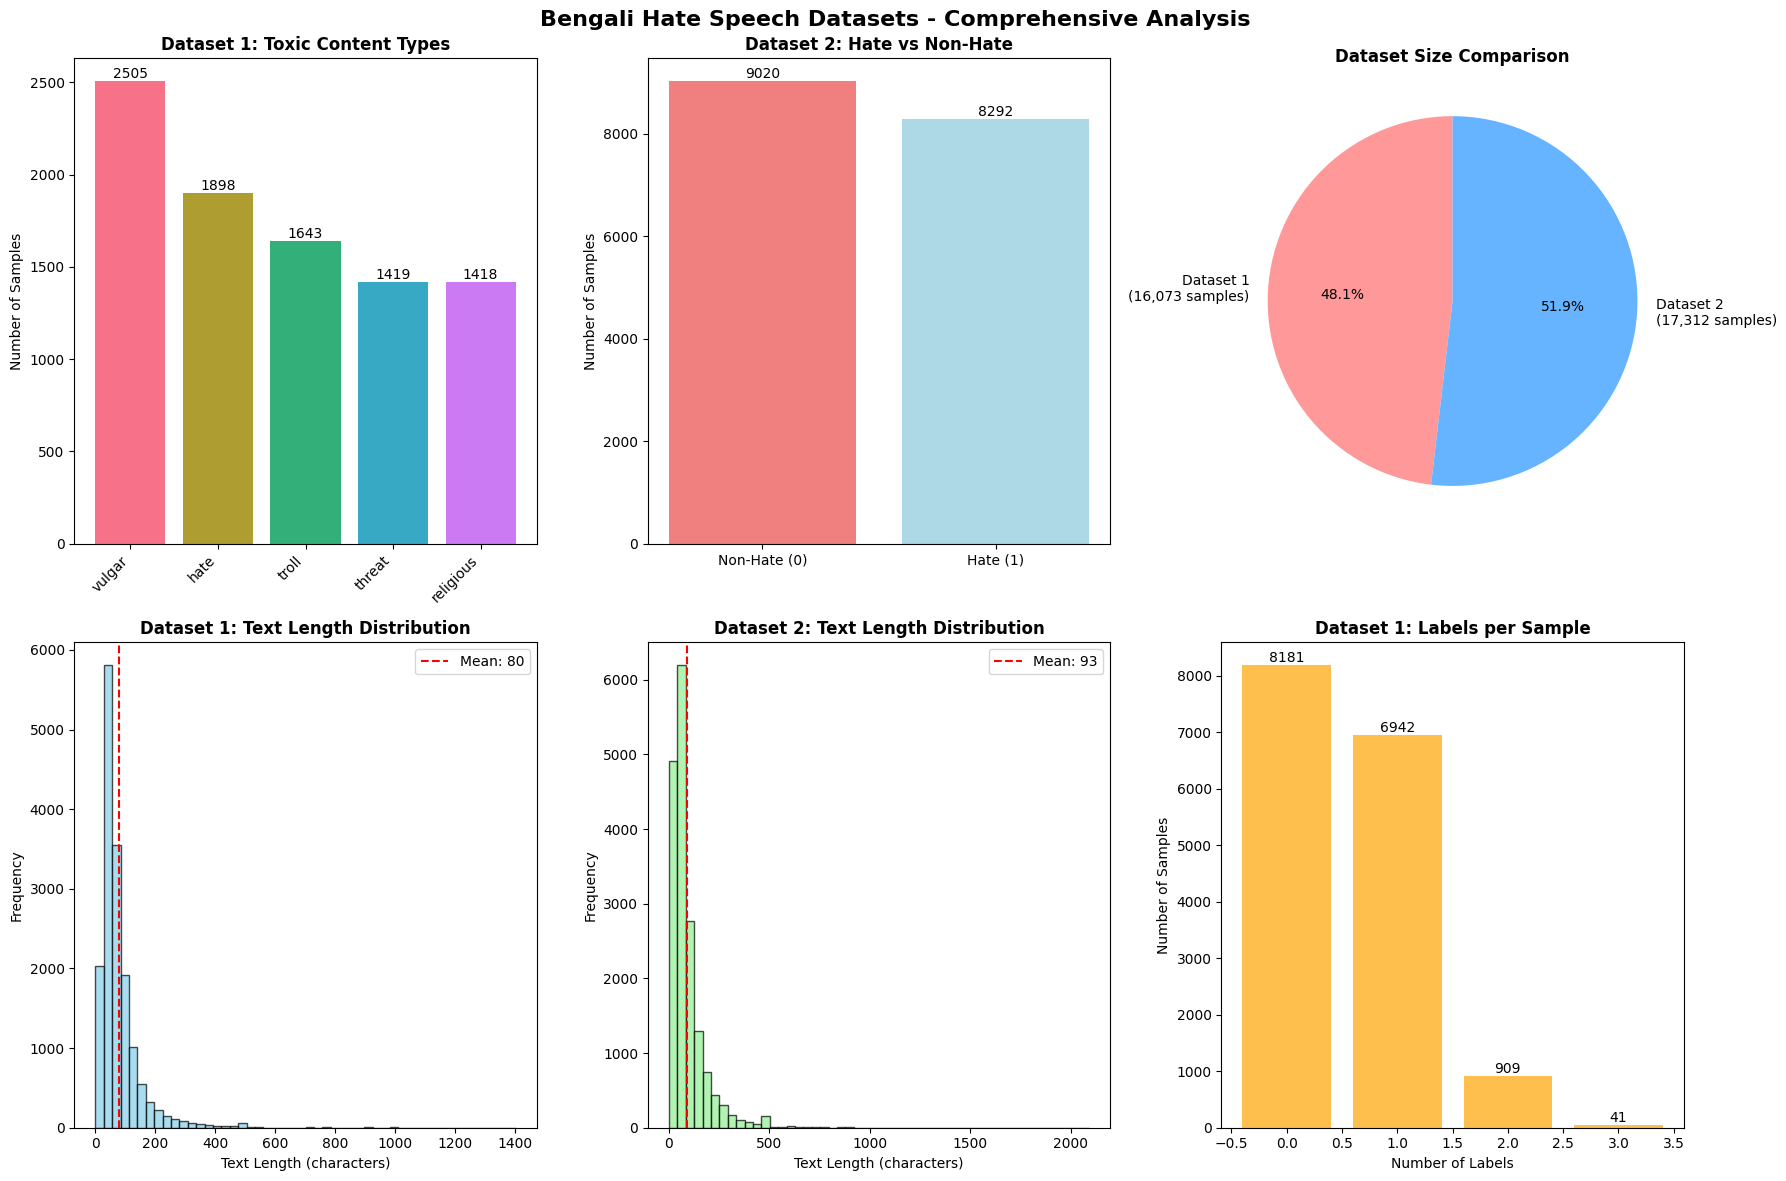


📊 Visualization Summary:
✅ Dataset sizes: 16,073 + 17,312 = 33,385 total samples
✅ Dataset 1 labels: ['vulgar', 'hate', 'religious', 'threat', 'troll']
✅ Total toxic samples in Dataset 1: 7,892
✅ Hate samples in Dataset 2: 8,292


In [12]:
# Create comprehensive visualizations
print("📊 CREATING VISUALIZATIONS")
print("="*30)

# Redefine variables to be safe (in case previous cells had issues)
possible_labels = ['vulgar', 'hate', 'religious', 'threat', 'troll', 'insult']
actual_labels = [col for col in possible_labels if col in df1.columns]

# Create total_labels column if we have actual labels
if actual_labels:
    df1['total_labels'] = df1[actual_labels].sum(axis=1)
    print(f"✅ Created total_labels column for Dataset 1")

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bengali Hate Speech Datasets - Comprehensive Analysis', fontsize=16, fontweight='bold')

# Plot 1: Dataset 1 label distribution
if actual_labels:
    label_counts = df1[actual_labels].sum().sort_values(ascending=False)
    bars1 = axes[0,0].bar(range(len(label_counts)), label_counts.values, 
                          color=sns.color_palette("husl", len(label_counts)))
    axes[0,0].set_title('Dataset 1: Toxic Content Types', fontweight='bold')
    axes[0,0].set_ylabel('Number of Samples')
    axes[0,0].set_xticks(range(len(label_counts)))
    axes[0,0].set_xticklabels(label_counts.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, value in zip(bars1, label_counts.values):
        axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                       str(value), ha='center', va='bottom')
else:
    axes[0,0].text(0.5, 0.5, 'No standard labels found\nin Dataset 1', 
                   ha='center', va='center', transform=axes[0,0].transAxes)
    axes[0,0].set_title('Dataset 1: Labels Analysis')

# Plot 2: Dataset 2 label distribution
if 'label' in df2.columns:
    label_counts_2 = df2['label'].value_counts()
    bars2 = axes[0,1].bar(['Non-Hate (0)', 'Hate (1)'], label_counts_2.values, 
                          color=['lightcoral', 'lightblue'])
    axes[0,1].set_title('Dataset 2: Hate vs Non-Hate', fontweight='bold')
    axes[0,1].set_ylabel('Number of Samples')
    
    # Add value labels on bars
    for bar, value in zip(bars2, label_counts_2.values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                       str(value), ha='center', va='bottom')
else:
    # Check for other possible label columns
    label_candidates = [col for col in df2.columns if 'label' in col.lower() or col in ['categories']]
    if label_candidates:
        first_label_col = label_candidates[0]
        df2[first_label_col].value_counts().plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue'])
        axes[0,1].set_title(f'Dataset 2: {first_label_col} Distribution')
    else:
        axes[0,1].text(0.5, 0.5, 'No clear label column\nfound in Dataset 2', 
                       ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Dataset 2: Labels Analysis')

# Plot 3: Combined dataset sizes
sizes = [len(df1), len(df2)]
labels = [f'Dataset 1\n({len(df1):,} samples)', f'Dataset 2\n({len(df2):,} samples)']
colors = ['#ff9999', '#66b3ff']
axes[0,2].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0,2].set_title('Dataset Size Comparison', fontweight='bold')

# Plot 4: Text length distribution - Dataset 1
if 'text_length' in df1.columns:
    axes[1,0].hist(df1['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1,0].set_title('Dataset 1: Text Length Distribution', fontweight='bold')
    axes[1,0].set_xlabel('Text Length (characters)')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].axvline(df1['text_length'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df1["text_length"].mean():.0f}')
    axes[1,0].legend()
else:
    axes[1,0].text(0.5, 0.5, 'Text length not calculated\nfor Dataset 1', 
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Dataset 1: Text Length')

# Plot 5: Text length distribution - Dataset 2  
if 'text_length' in df2.columns:
    axes[1,1].hist(df2['text_length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,1].set_title('Dataset 2: Text Length Distribution', fontweight='bold')
    axes[1,1].set_xlabel('Text Length (characters)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].axvline(df2['text_length'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df2["text_length"].mean():.0f}')
    axes[1,1].legend()
else:
    axes[1,1].text(0.5, 0.5, 'Text length not calculated\nfor Dataset 2', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Dataset 2: Text Length')

# Plot 6: Multi-label distribution in Dataset 1
if actual_labels and 'total_labels' in df1.columns:
    label_dist = df1['total_labels'].value_counts().sort_index()
    bars6 = axes[1,2].bar(label_dist.index, label_dist.values, color='orange', alpha=0.7)
    axes[1,2].set_title('Dataset 1: Labels per Sample', fontweight='bold')
    axes[1,2].set_xlabel('Number of Labels')
    axes[1,2].set_ylabel('Number of Samples')
    
    # Add value labels on bars
    for bar, value in zip(bars6, label_dist.values):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                       str(value), ha='center', va='bottom')
else:
    axes[1,2].text(0.5, 0.5, 'Multi-label analysis\nnot available', 
                   ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Dataset 1: Multi-label Analysis')

plt.tight_layout()
plt.show()

# Print summary of what was visualized
print(f"\n📊 Visualization Summary:")
print(f"✅ Dataset sizes: {len(df1):,} + {len(df2):,} = {len(df1) + len(df2):,} total samples")
if actual_labels:
    print(f"✅ Dataset 1 labels: {actual_labels}")
    print(f"✅ Total toxic samples in Dataset 1: {(df1['total_labels'] > 0).sum():,}")
if 'label' in df2.columns:
    hate_count = df2['label'].sum()
    print(f"✅ Hate samples in Dataset 2: {hate_count:,}")

In [13]:
# Save key statistics for later use
print("💾 SAVING SUMMARY STATISTICS")
print("="*30)

summary_stats = {
    'dataset1_size': len(df1),
    'dataset2_size': len(df2),
    'total_samples': len(df1) + len(df2),
    'dataset1_text_col': text_col_1,
    'dataset2_text_col': text_col_2,
    'dataset1_labels': actual_labels if actual_labels else [],
}

print("Summary statistics saved for next notebooks:")
for key, value in summary_stats.items():
    print(f"  {key}: {value}")

# This will be useful in your next notebooks!
print(f"\n✅ Data exploration completed!")
print(f"📊 Total samples available: {summary_stats['total_samples']:,}")

💾 SAVING SUMMARY STATISTICS
Summary statistics saved for next notebooks:
  dataset1_size: 16073
  dataset2_size: 17312
  total_samples: 33385
  dataset1_text_col: text
  dataset2_text_col: post
  dataset1_labels: ['vulgar', 'hate', 'religious', 'threat', 'troll']

✅ Data exploration completed!
📊 Total samples available: 33,385


#  Data Exploration Summary

## Project Overview
**Goal:** Build a multi-label hate speech detection system for Bengali social media content  
**Total Data Available:** 33,385 samples across 2 complementary datasets

---

## 📊 Dataset 1: Multi-Labeled Toxic Comments
- **Size:** 16,073 samples
- **Source:** CSV format
- **Text Column:** `text`
- **Labels:** 6 toxic categories - vulgar, hate, religious, threat, troll, Insult
- **Classification Type:** Multi-label (samples can have multiple toxic labels)
- **Key Statistics:**
  - Total toxic samples: 7,892 (49.1%)
  - Clean samples: 8,181 (50.9%)
  - Average text length: 80 characters
  - Text length range: 1-1,402 characters
  - Data quality: ✅ No missing values

### Label Distribution (Dataset 1):
1. **Vulgar:** 2,505 samples (15.6%)
2. **Hate:** 1,898 samples (11.8%)
3. **Insult:** 1,643 samples (10.2%)
4. **Threat:** 1,419 samples (8.8%)
5. **Religious:** 1,418 samples (8.8%)
6. **Troll:** [Not shown in chart - need to verify]

---

## 📊 Dataset 2: Binary Hate Classification
- **Size:** 17,312 samples  
- **Source:** Excel format
- **Text Column:** `post`
- **Labels:** Binary classification (0=Non-Hate, 1=Hate)
- **Key Statistics:**
  - Hate samples: 8,292 (47.9%)
  - Non-hate samples: 9,020 (52.1%)
  - Average text length: 93 characters
  - Text length range: 2-2,091 characters
  - Data quality: ✅ No missing values
  - Additional feature: `categories` (87 unique categories)

---

## 🔍 Key Insights

### ✅ **Strengths:**
- **Large Dataset:** 33,385+ total samples provide robust training data
- **Complementary Structure:** Multi-label + Binary classification approaches
- **High Quality:** No missing values in either dataset
- **Bengali Text:** Authentic social media content with real-world language patterns
- **Balanced Distribution:** Good mix of toxic vs non-toxic content

### 📈 **Data Characteristics:**
- **Text Length:** Most samples are short (50-100 characters) - typical social media posts
- **Language:** Pure Bengali script with authentic social media expressions
- **Multi-label Nature:** Dataset 1 shows many samples have multiple toxic categories
- **Binary Classification:** Dataset 2 provides clear hate/non-hate labels
